In [1]:
from puncta_quantification import *
from numpy import array

In [2]:
post0gr_dict_list = []
post0gr_dict_list.append(compile_csv_files('/home/jiongyi/Documents/dna_damage/immunofluorescence/2018_12_28/u2os_ipo9_kd_30_m_post_0gr_pH2AX_53pb1_dapi_a'))
post0gr_dict_list.append(compile_csv_files('/home/jiongyi/Documents/dna_damage/immunofluorescence/2019_01_14/6hr_ipo9_kd_a_happy/'))
post0gr_dict_list.append(compile_csv_files('/home/jiongyi/Documents/dna_damage/immunofluorescence/2019_01_14/24hr_ipo9_kd_a_happy'))

post2gr_dict_list = []
post2gr_dict_list.append(compile_csv_files('/home/jiongyi/Documents/dna_damage/immunofluorescence/2018_12_28/u2os_ipo9_kd_60_m_post_2gr_pH2AX_53pb1_dapi_a'))
post2gr_dict_list.append(compile_csv_files('/home/jiongyi/Documents/dna_damage/immunofluorescence/2019_01_14/6hr_ipo9_kd_a_sad'))
post2gr_dict_list.append(compile_csv_files('/home/jiongyi/Documents/dna_damage/immunofluorescence/2019_01_14/24hr_ipo9_kd_sad/'))

In [3]:
post0gr_lambda1_flux_density_median_row, post0gr_lambda1_flux_density_stderr_2d, post0gr_lambda2_flux_density_median_row, post0gr_lambda2_flux_density_stderr_2d, post0gr_no_overlaps_density_median_row, post0gr_no_overlaps_stderr_2d = compute_medians(post0gr_dict_list)
post2gr_lambda1_flux_density_median_row, post2gr_lambda1_flux_density_stderr_2d, post2gr_lambda2_flux_density_median_row, post2gr_lambda2_flux_density_stderr_2d, post2gr_no_overlaps_density_median_row, post2gr_no_overlaps_density_stderr_2d = compute_medians(post2gr_dict_list)

Text(0.5, 1.0, 'IPO9 KD U2OS')

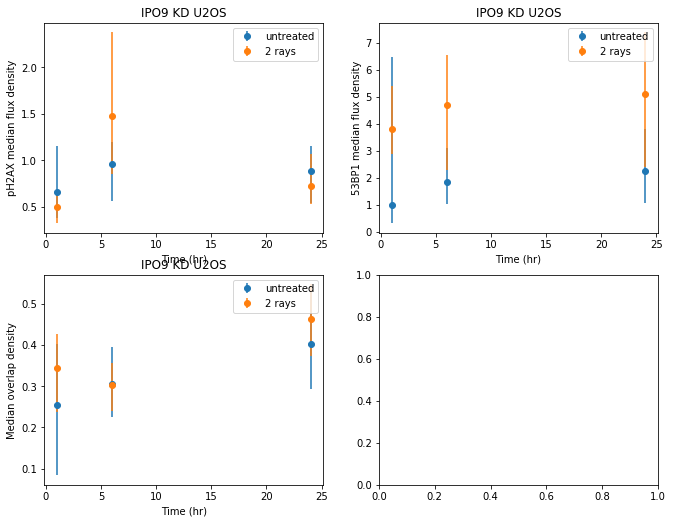

In [4]:
from matplotlib.pyplot import subplots
hour_row = array([1, 6, 24])
fig_obj, axes_obj = subplots(ncols = 2, nrows = 2)
fig_obj.set_figwidth(11)
fig_obj.set_figheight(8.5)
axes_obj[0, 0].errorbar(hour_row, post0gr_lambda1_flux_density_median_row,
                  yerr = post0gr_lambda1_flux_density_stderr_2d.transpose(), marker = 'o', linestyle = '', label = 'untreated')
axes_obj[0, 0].errorbar(hour_row, post2gr_lambda1_flux_density_median_row,
                  yerr = post2gr_lambda1_flux_density_stderr_2d.transpose(), marker = 'o', linestyle = '', label = '2 rays')
axes_obj[0, 0].legend()
axes_obj[0, 0].set_xlabel('Time (hr)')
axes_obj[0, 0].set_ylabel('pH2AX median flux density')
axes_obj[0, 0].set_title('IPO9 KD U2OS')

axes_obj[0, 1].errorbar(hour_row, post0gr_lambda2_flux_density_median_row,
                  yerr = post0gr_lambda2_flux_density_stderr_2d.transpose(), marker = 'o', linestyle = '', label = 'untreated')
axes_obj[0, 1].errorbar(hour_row, post2gr_lambda2_flux_density_median_row,
                  yerr = post2gr_lambda2_flux_density_stderr_2d.transpose(), marker = 'o', linestyle = '', label = '2 rays')
axes_obj[0, 1].legend()
axes_obj[0, 1].set_xlabel('Time (hr)')
axes_obj[0, 1].set_ylabel('53BP1 median flux density')
axes_obj[0, 1].set_title('IPO9 KD U2OS')

axes_obj[1, 0].errorbar(hour_row, post0gr_no_overlaps_density_median_row,
                  yerr = post0gr_no_overlaps_stderr_2d.transpose(), marker = 'o', linestyle = '', label = 'untreated')
axes_obj[1, 0].errorbar(hour_row, post2gr_no_overlaps_density_median_row,
                  yerr = post2gr_no_overlaps_density_stderr_2d.transpose(), marker = 'o', linestyle = '', label = '2 rays')
axes_obj[1, 0].legend()
axes_obj[1, 0].set_xlabel('Time (hr)')
axes_obj[1, 0].set_ylabel('Median overlap density')
axes_obj[1, 0].set_title('IPO9 KD U2OS')